------------

**FPS Critic Inc., owner of PureSkill.gg, is not liable for any AWS
costs you incur. Only run this notebook if you understand and accept
the AWS billing implications.**

------------

In [6]:
%%html
<!-- ignore this please -->
<style>
  table {margin-left: 0 !important;}
</style>

# Getting pre-built tomes from the ADX

The csds files are powerful to work with because they contain full player telemetry and game event data. However, these are quite large and for many purposes. Tomes are often much smaller, so are inexpensive to download and share.

A second data set of pre-built tomes is included with the ADX subscription. This is data from the beginning of May 2021 through the end of December 2021. Many aspects of the game are haven't changed, so these tomes should be an excellent start for many projects.

Here are the tomes and their sizes:

|Channel Name|Size|
|:---|:---|
|channel_bomb_action.2021-05-01,2022-01-01 | 276.46 MB |
|channel_bomb_state.2021-05-01,2022-01-01 | 52.97 MB |
|channel_bot_takeover.2021-05-01,2022-01-01 | 10.3 MB |
|channel_grenade_state.2021-05-01,2022-01-01 | 1078.91 MB |
|channel_item_remove.2021-05-01,2022-01-01 | 2274.52 MB |
|channel_molotov_state.2021-05-01,2022-01-01 | 307.35 MB |
|channel_player_action.2021-05-01,2022-01-01 | 3043.63 MB |
|channel_player_blind.2021-05-01,2022-01-01 | 646.5 MB |
|channel_player_connect.2021-05-01,2022-01-01 | 13.46 MB |
|channel_player_death.2021-05-01,2022-01-01 | 917.26 MB |
|channel_player_disconnect.2021-05-01,2022-01-01 | 18.74 MB |
|channel_player_fall.2021-05-01,2022-01-01 | 26.75 MB |
|channel_player_hurt.2021-05-01,2022-01-01 | 3353.22 MB |
|channel_player_info.2021-05-01,2022-01-01 | 108.19 MB |
|channel_player_interaction.2021-05-01,2022-01-01 | 9.87 MB |
|channel_player_personal.2021-05-01,2022-01-01 | 60.36 MB |
|channel_player_spawn.2021-05-01,2022-01-01 | 208.35 MB |
|channel_round_end.2021-05-01,2022-01-01 | 32.29 MB |
|channel_round_mvp.2021-05-01,2022-01-01 | 33.35 MB |
|channel_round_start.2021-05-01,2022-01-01 | 30.47 MB |
|channel_round_state.2021-05-01,2022-01-01 | 96.82 MB |
|channel_weapon_action.2021-05-01,2022-01-01 | 1292.28 MB |
|header_tome.2021-05-01,2022-01-01 | 13.07 MB |
|subheader_tome_active_duty.2021-05-01,2022-01-01 | 8.39 MB |

---

The larger channels such as `player_vector` and `player_status` are not included.

# Get the data set ID for the tome data set

**Important:** This a different data set from the previous notebook. Therefore, there is a different data set id. See below for where to go to get the correct data set id for the tomes we have pre-built. 

Also set your bucket name and prefix if needed.

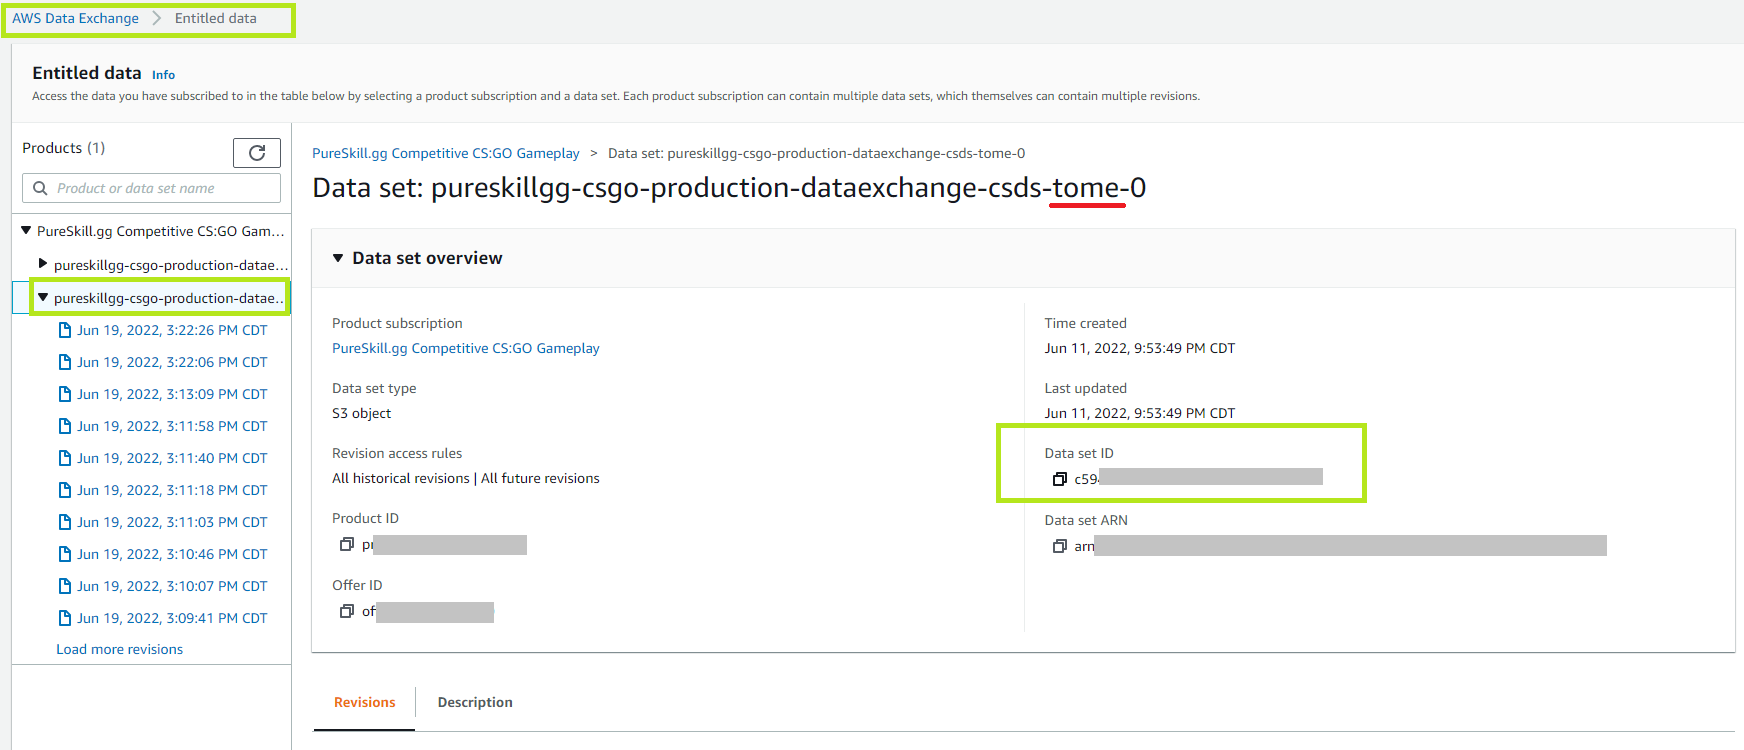

In [ ]:
dataset_id = "c5943d0f4bbce90b2f7e5f8488595e86"
bucket = None 
prefix = None

In [ ]:
if dataset_id == "c5943d0f4bbce90b2f7e5f8488595e86":
    raise Exception("Your dataset_id is still the default. Please subscribe on the ADX")

# Download the tomes

Since the tomes are only about 15 GB the cost is minimal to transfer all of them, so we will export them all. Check the [previous notebook]() for a cost calculator.

In [ ]:
from pureskillgg_makenew_pyskill.notebook import setup_notebook

In [ ]:
setup_notebook()

In [ ]:
# %load ../usual_suspects.py
# pylint: disable=unused-import
import time
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pureskillgg_dsdk.tome import TomeCuratorFs

pd.set_option("display.max_columns", 150)
pd.set_option("display.max_rows", 150)
pd.set_option("display.min_rows", 150)
# pd.set_option('display.float_format', '{:.4f}'.format)

curator = TomeCuratorFs()


In [ ]:
import boto3
from pureskillgg_dsdk import export_multiple_adx_dataset_revisions_to_s3

In [ ]:
def get_bucket_name(bucket, account_id):
    if bucket is not None:
        return bucket
    
    account_aliases = boto3.client('iam').list_account_aliases()['AccountAliases']
    if len(account_aliases) == 0:
        account_alias = account_id
    else:
        account_alias = account_aliases[0]
    return "-".join([account_alias, "pureskillgg", "dataset"])

In [ ]:
if bucket is not None:
    account_id = boto3.client("sts").get_caller_identity().get("Account")
    bucket = get_bucket_name(bucket, account_id)

In [ ]:
export_multiple_adx_dataset_revisions_to_s3(
    bucket,
    dataset_id,
    prefix=prefix
)

# Transferring Data from S3 to Local

There are many many ways to do this so we won't list them all here. Here is an example with the AWS CLI:

```
aws s3 sync s3://my-bucket/tome/ /PATH/TO/ROOT/tome
```

It is **CRITICALLY IMPORTANT** to maintain the path structure. In the example above, you could change the `/PATH/TO/ROOT` but the `/tome` is not something that you may change. The reader will not work because the folder structure is part of the key used to read each file.

# Read and use the tomes!

All that is left is to read in the tomes you're good to go. This is only the beginning!

In [ ]:
df = curator.get_dataframe('header_tome.2021-05-01,2022-01-01')

In [ ]:
print(len(df))
# prints 67260

In [ ]:
df['map_name'].value_counts()

In [ ]:
df = curator.get_dataframe('subheader_tome_active_duty.2021-05-01,2022-01-01')

In [ ]:
print(len(df))
# prints 61465

In [ ]:
df['map_name'].value_counts()

In [ ]:
df = curator.get_dataframe('channel_player_death.2021-05-01,2022-01-01')

In [ ]:
print(len(df))
# prints 9012758

In [ ]:
plt.rcParams["figure.figsize"] = (15,8)
plt.hist(df['blind_duration'],bins=80,rwidth=0.85)
plt.xlabel('Seconds')
plt.ylabel('Count')

No more notebooks!